In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense # type: ignore
from sklearn.metrics import accuracy_score

In [2]:
data = load_breast_cancer()
x = data.data   
y = data.target

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [3]:
model = Sequential([
    Dense(units=64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train,y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1)

Epoch 1/50


c:\Users\Raktim\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6346 - loss: 0.5938 - val_accuracy: 0.9451 - val_loss: 0.4049
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9203 - loss: 0.3456 - val_accuracy: 0.9670 - val_loss: 0.2639
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9478 - loss: 0.2196 - val_accuracy: 0.9670 - val_loss: 0.1873
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9505 - loss: 0.1547 - val_accuracy: 0.9670 - val_loss: 0.1468
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9588 - loss: 0.1203 - val_accuracy: 0.9780 - val_loss: 0.1257
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9753 - loss: 0.0981 - val_accuracy: 0.9670 - val_loss: 0.1145
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9863 - loss: 0.0838 - val_accuracy: 0.9670 - val_loss: 0.1072
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9863 - loss: 0.0734 - val_accuracy: 0.9670 - val_loss: 0.1018
Ep

In [4]:
y_pred = (model.predict(x_test) > 0.5).astype(np.int32)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Test Accuracy: 0.96


In [5]:
y_pred = (model.predict(x_test) > 0.6).astype(np.int32)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Test Accuracy: 0.96


In [6]:
y_pred = (model.predict(x_test) > 0.7).astype(np.int32)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Test Accuracy: 0.96


In [7]:
y_pred = (model.predict(x_test) > 0.4).astype(np.int32)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Test Accuracy: 0.96


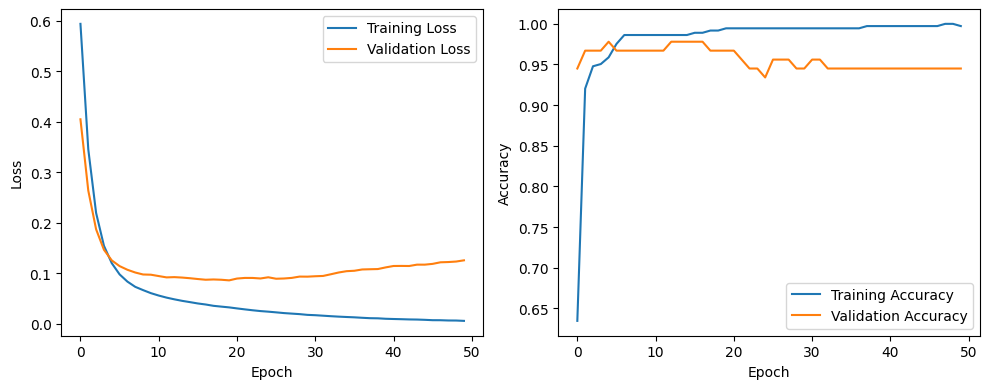

In [11]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()